# **Lets learn A/B Testing!**

**Hypothesis format**
the general framing format:
- basend on x, we believe that if we do y
- then z will happen
- As measured by metrics M

example:
- based on user experience research, we believe that if we update our checkout page design
- then the percentage of purchasing customers will increase

Null hypothesis -> the percentageof purchasing customers will not change

In [ ]:
import pandas as pd

In [ ]:
checkout = pd.read_csv('/content/checkout.csv')
adSmart = pd.read_csv('/content/AdSmartABdata.csv')

In [ ]:
checkout.head()

Unnamed: 0  user_id checkout_page  ...  gender  browser time_on_page
0           0   877621             A  ...       F   chrome    66.168628
1           1   876599             A  ...       M  firefox    49.801887
2           2   905407             A  ...       M   chrome    56.744856
3           3   883562             A  ...       M   safari    71.890718
4           4   840542             A  ...       F   safari    67.410696

[5 rows x 8 columns]

We have checkout database, lets see the data

In [ ]:
#calculate the number of users in group a and group b
n_A = checkout[checkout['checkout_page']=="A"]['purchased'].count()
n_B = checkout[checkout['checkout_page']=="B"]['purchased'].count()
print('Group A users : ',n_A)
print('Group B users : ',n_B)

Group A users :  3000
Group B users :  3000


In [ ]:
#lets calculate the mean purchase rates of groups A and B
p_A = checkout[checkout['checkout_page'] == "A"]['purchased'].mean()
p_B = checkout[checkout['checkout_page'] == "B"]['purchased'].mean()
print('Group A mean purchase rate: ',p_A)
print('Group B mean purchase rate: ', p_B)

Group A mean purchase rate:  0.8203333333333334
Group B mean purchase rate:  0.847


**Simulating and Plotting distributions**
The number of purchaser in n trials with purchasing probability  is binomially distributed

lets make a binomial distribution:

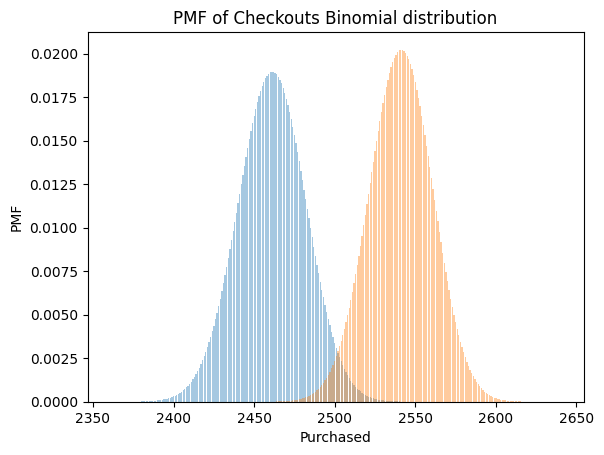

In [ ]:
#impoort binom from scipy library
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

#create x-axis range and binomial distribution A and B
x=np.arange(n_A*p_A - 100 , n_B*p_B + 100) # kenapa dikurang/tambah 100
binom_a = binom.pmf(x, n_A, p_A)
binom_b = binom.pmf(x, n_B, p_B)

#Plot binomial distribution A and B
plt.bar(x, binom_a, alpha=0.4, label="Checkout A")
plt.bar(x, binom_b, alpha=0.4, label="Checkout B")
plt.xlabel("Purchased")
plt.ylabel("PMF")
plt.title('PMF of Checkouts Binomial distribution')
plt.show()

#these distribution tell us, at most, a certain number of users purhasing in each group, but they dont tell us about
#the long term purchase probability of the overall population if we were to present either checkout page to the users
# to do so we need inference on the means using normal distribution

## **Central limit theorem**
for sufficiently large sample size, the distribution of the sample means, p, will be:
- normally distributed around the true population mean
- with a standard deviation = standard error mean
- irrespective of the distribution of the underlying data

we used this to approximate the true mean of the populatioin from which the data was sampled using this formula where p and n are the mean proportion and the sample size respectively

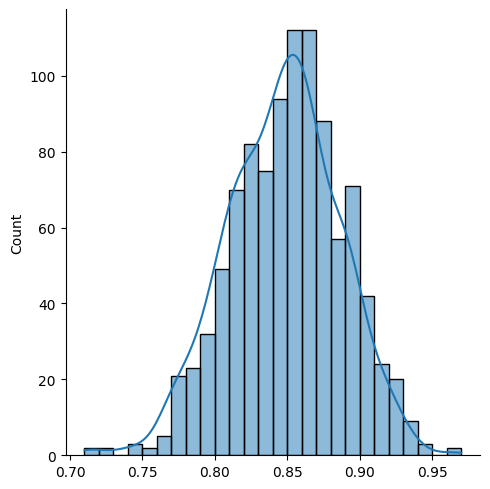

In [ ]:
#Central limit theorem simulation in python
import seaborn as sns
#set a random seed for repeatability
np.random.seed(47)

#create an empty list to hold means
sampled_means =[]

#create loop to simulate 1000 sample means
for i in range(1000):
  # Take a sample of n=100
  sample =checkout['purchased'].sample(100,replace=True)
  #get the sample mean and append to list
  sample_mean=np.mean(sample)
  sampled_means.append(sample_mean)

#Plot distribution
sns.displot(sampled_means,kde=True)
plt.show()

since the sample mean will foloow a normal distributioin, we can plot them for group A and B.

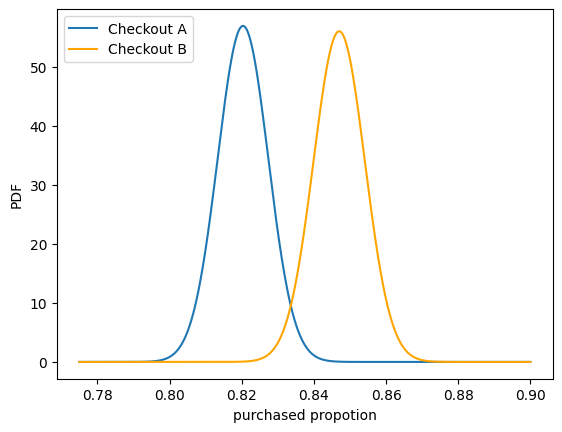

In [ ]:
#Hypothesis Mathematical distribution

#import norm from the scipy library
from scipy.stats import norm
import matplotlib.pyplot as plt

#create x axis range and normal distribution A and B
x= np.linspace(0.775,0.9,500)
norm_a= norm.pdf(x,p_A, np.sqrt(p_A*(1-p_A)/ n_A))
norm_b= norm.pdf(x,p_B, np.sqrt(p_B*(1-p_A)/ n_B))

#plot normal distributions A and B
sns.lineplot(x=x,y= norm_a, label= "Checkout A")
sns.lineplot(x=x,y= norm_b, color="orange", label="Checkout B")
#ax.axvline(p_A, linestyle = "--")
#ax.axvline(p_b, linestyle = "--")
plt.xlabel("purchased propotion")
plt.ylabel('PDF')
plt.legend(loc="upper left")
plt.show()


# **Experimental Design: setting up testing parameters**

**Design parameter and error types**

1. Power (1- β)

β = Type II error = False negative. Commonly set at 80% ( I want to have at least an 80% chance of correctly rejecting the null hypothesis)

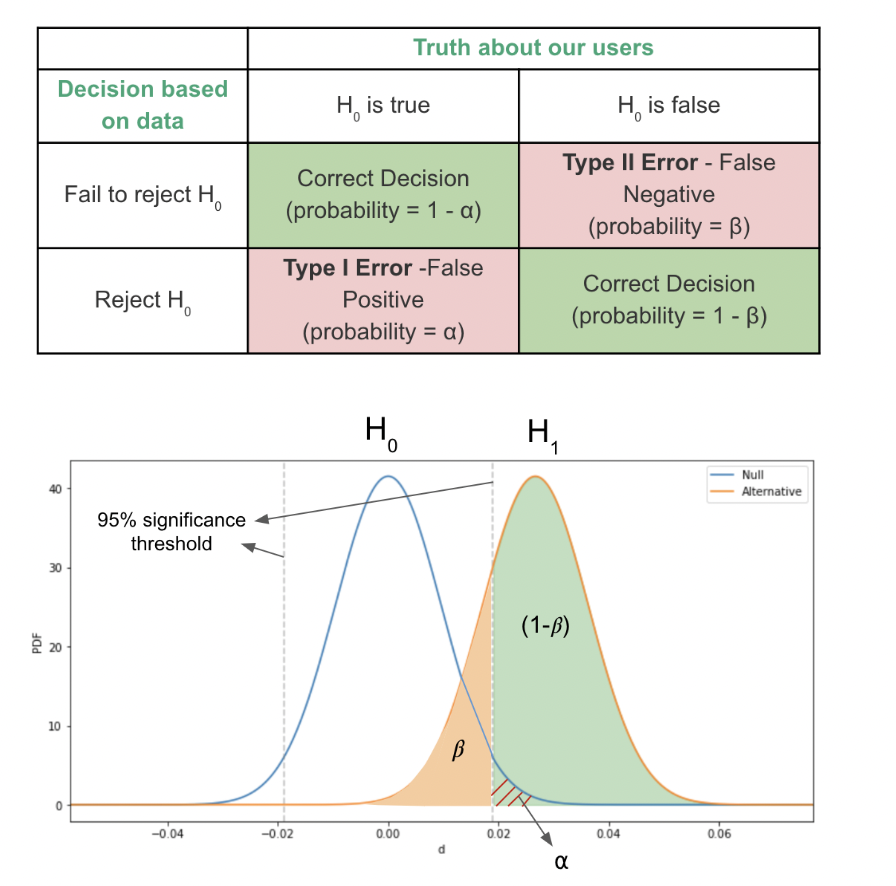

(picture source: datacamp ab test)

Statistical power -> the probability of detecting an effect of pre-determined size or higher, if the treatment result in a true difference in metrics.

2. Minimum detectable effect
or smallest difference we care to capture. in other words, how much the metrics need to move by for us to make a decision or change our mind about a default action. any effect under that level would be considered unimportant

3. significance level
α = Type I error= False Negative
commonly set at 5%

4. P value
probability of obtaining a result assuming the null hypothesis is true. if p value lower than alpha α reject the hypothesis and vice versa.



Ok lets work with analogy, imagine someone to the grocery store to buy a bags of chips. the person comesback and says the couldnt find it.

the questions we are trying to answer is: if the bag of chips was there, what is the probability that the person would have found it?

the answer depends on:
1. the time spends at the store = sample size/experiment duration
2. bags of chips size = effect size / MDE
3. store cleanliness/organization = data variance

# **Power Analysis**

**Effect size**





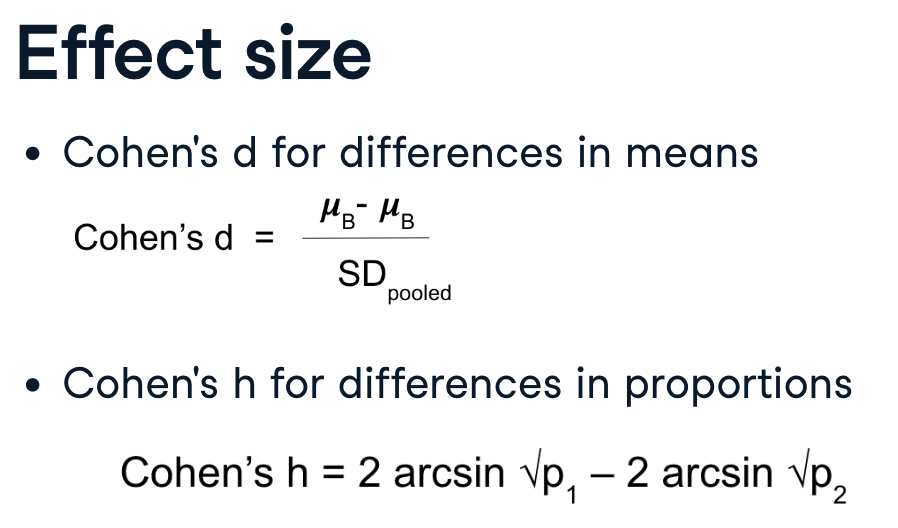

cohen's d is a type of effect size between 2 means. this is difference from the p value. p value can inform you that an effect exist but it will NOT reveal the size of the effect. this is what an effect size does.


cohen's d also known as the standardize mean difference. the formula of cohens d, see picture above is difference between 2 means and divided by a pooled of standard deviations.

Now, we used a pooled od std deviation because the std of population is unknown. we will used the sample std to estimate the population std.


for the original cohen'd D formual,this is used when there are 2 groups of equal size.

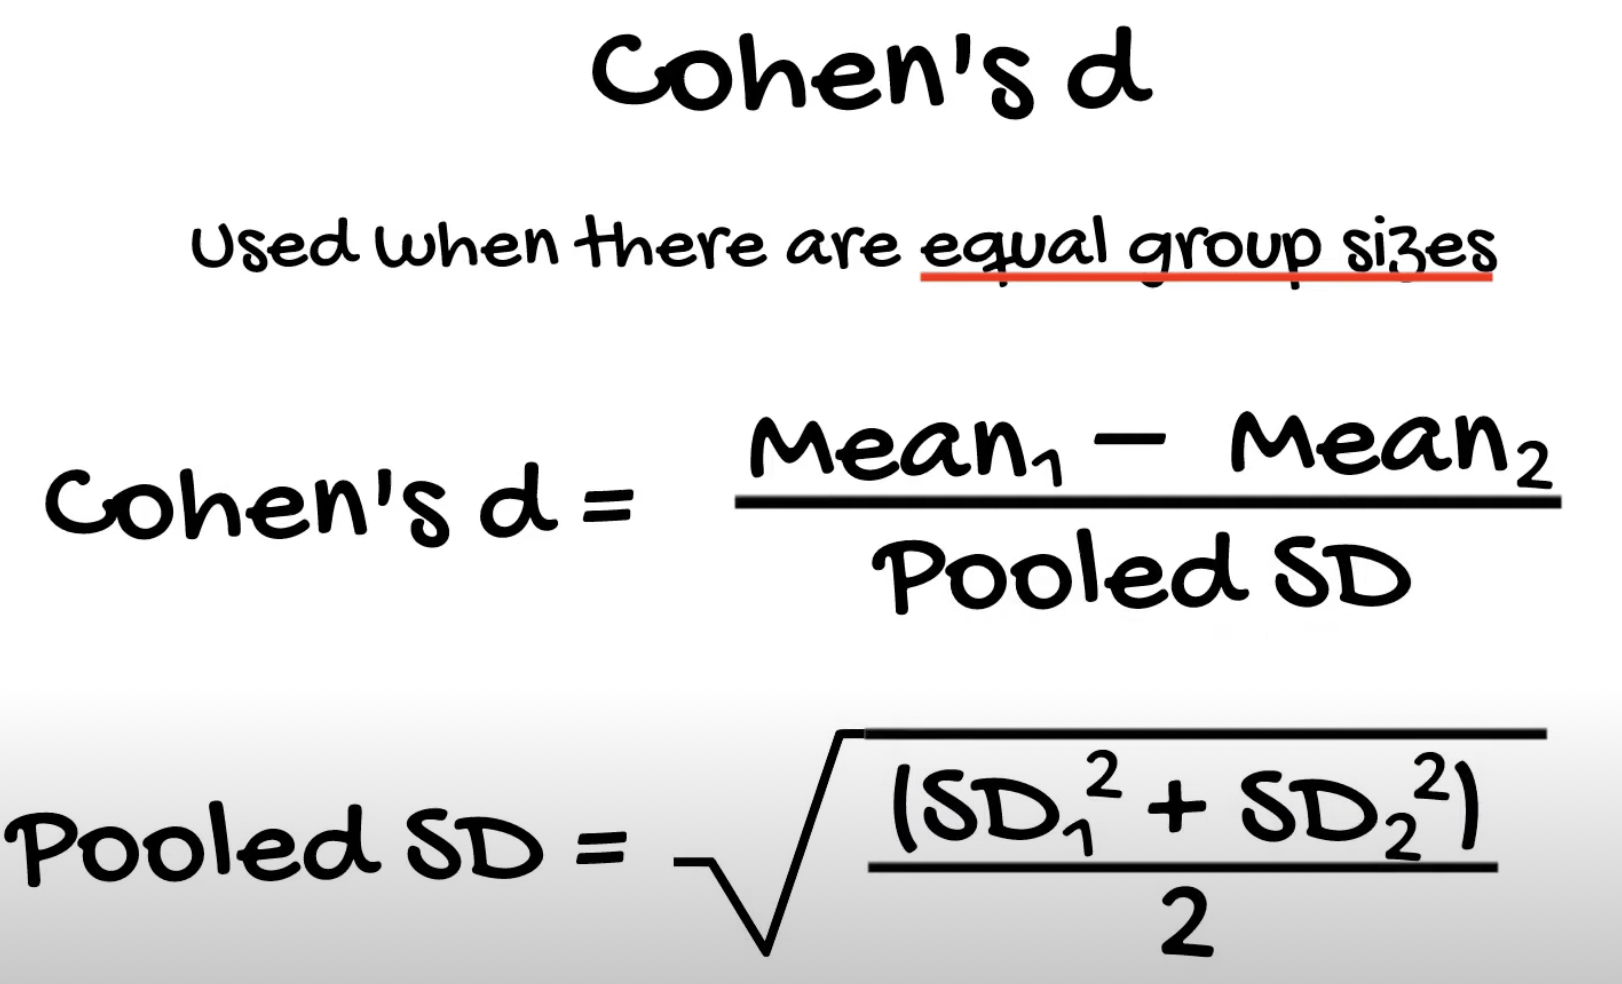

now there is also cohen'd ds, this is used where there is unequel group sizes. this formula have diferrent formula to calculate the pooled SD.

**How to interpret cohen's d**

**Simply you can think cohen's d as the number of standart deviation between 2 groups. so a value of 1, indicates the mean of the two groups differ by 1 standard deviations**



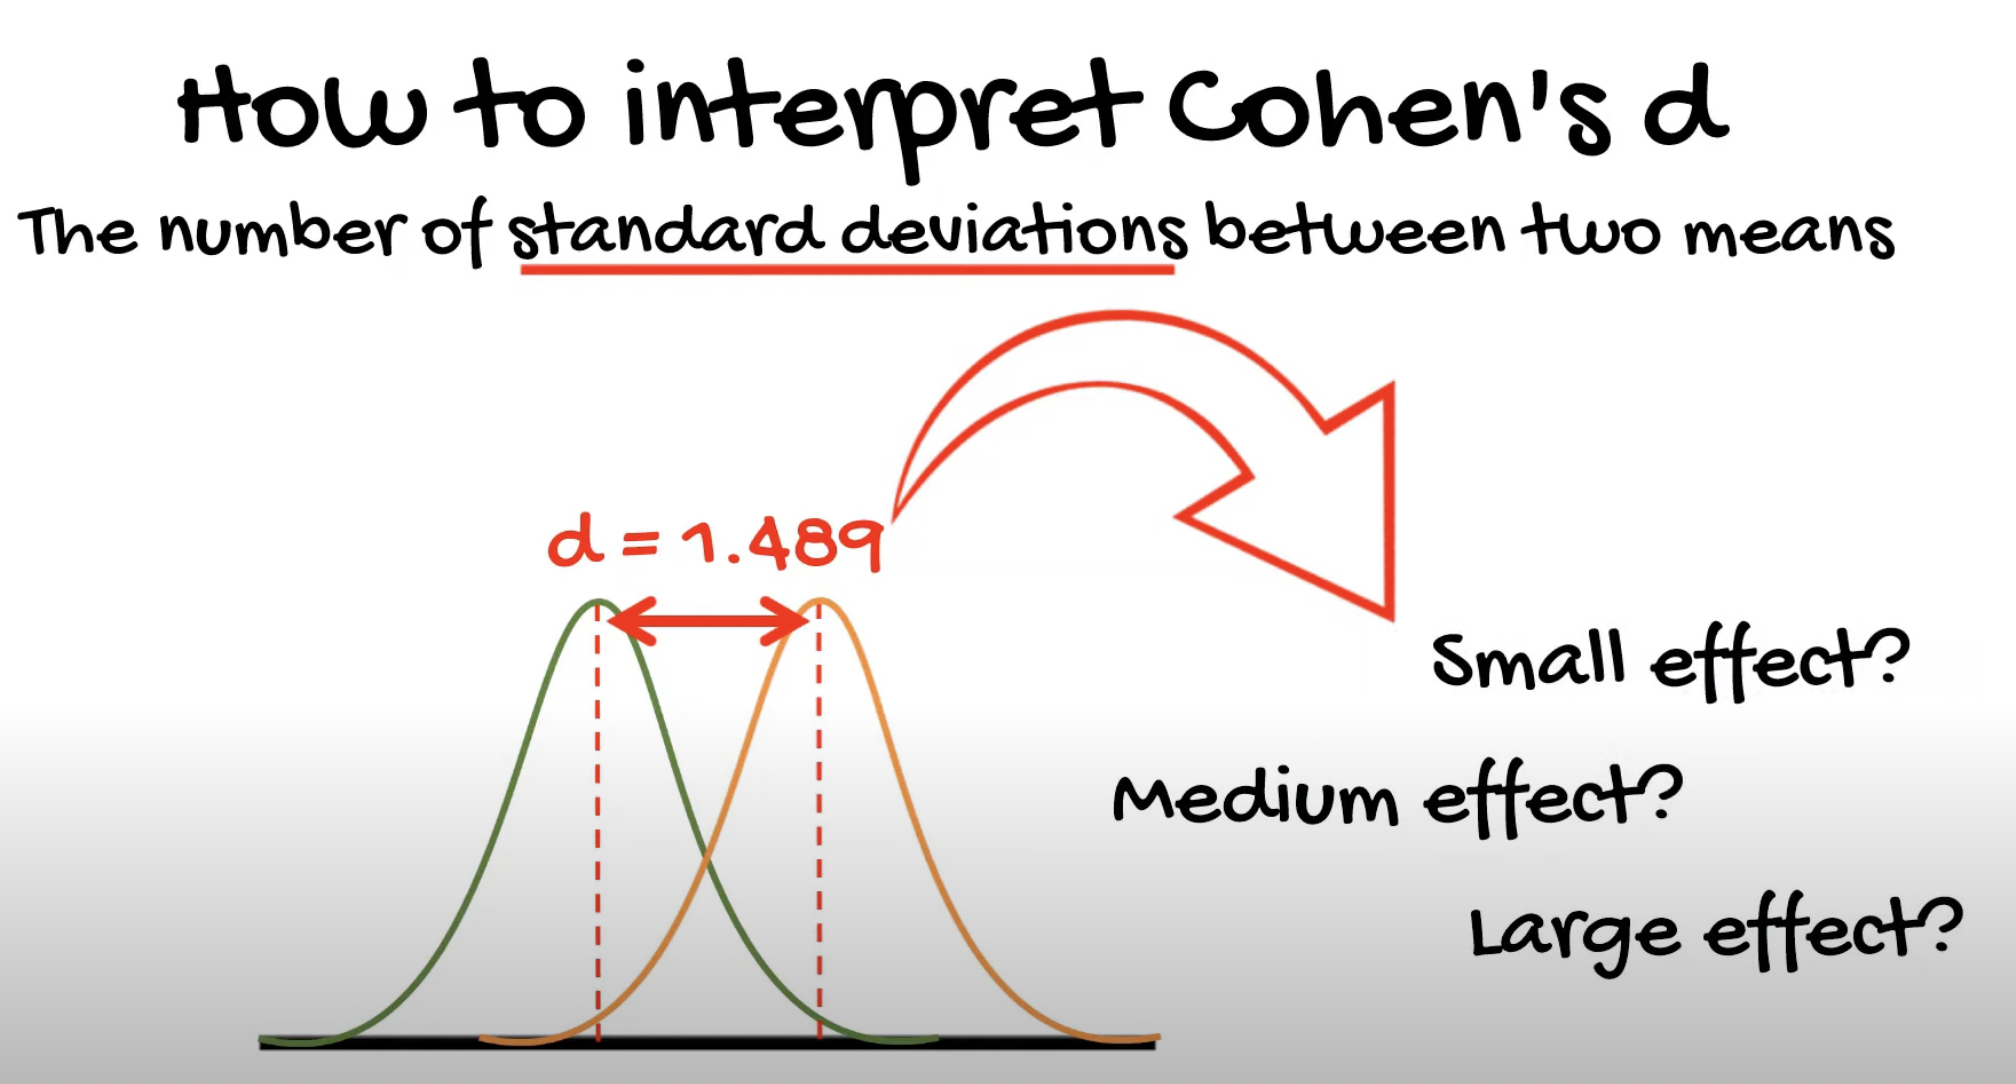

(picture source : https://www.youtube.com/watch?v=IetVSlrndpI)

A general rule of thumb:
- small effect : 0.2
- medium effect : 0.5
- large effect : 0.8


In [ ]:
#calculate standardized effect size EXAMPLE
from statsmodels.stats.proportion import proportion_effectsize
effect_size_std = proportion_effectsize(.33, .3)
print(effect_size_std)

0.06459994854032636


In [ ]:
#Calculate standardized effect size
#cohen's difference in PROPOTION
from statsmodels.stats.proportion import proportion_effectsize
effect_size_std = proportion_effectsize(p_B, p_A) #aturannya matter ya!!!! jadi minus aja
effect_size_std2 = proportion_effectsize(p_A, p_B)
print(effect_size_std)

0.07166382073486188


**Sample size estimations for proportions**

In [ ]:
#import power module
from statsmodels.stats import power

#calculate sample size
sample_size = power.TTestIndPower().solve_power(effect_size=effect_size_std,
                                                power=.8,
                                                alpha=.05,
                                                nobs1=None)
print(sample_size)

3057.547149774274


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


meaning it require around 3000 sample in each groups

## **Effect of sample size and MDE on power** EXAMPLE

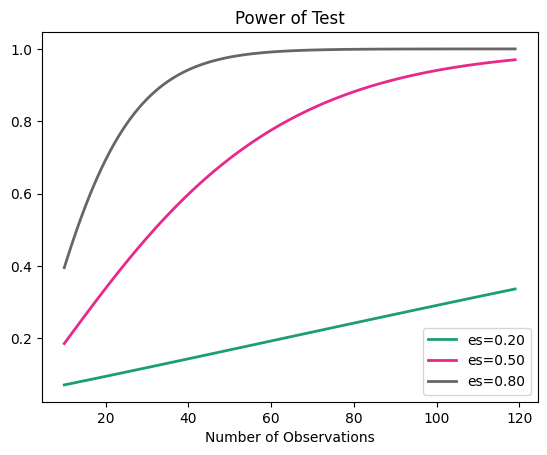

In [ ]:
#import t-test power package
from statsmodels.stats.power import TTestIndPower
import numpy as np
#specify parameters for power analysis
sample_sizes= np.array(range(10,120))
effect_sizes = np.array([0.2,0.5,0.8])
#plot power curves
plt = TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

#yg warna warni itu significant test or alpha

meaning to get power of 80% you need at least 60 samples

## **Sample size estimation for means (example)**

In [ ]:
#calculate the baseline meand order value
mean_A = checkout[checkout['checkout_page']=="A"]['order_value'].mean()
print(mean_A)

24.95643704349289


In [ ]:
std_A= checkout[checkout['checkout_page']=='A']['order_value'].std()
print(std_A)

2.4188367688133354


In [ ]:
#Specify the DESIRED miniminu average order value
mean_new = 26

In [ ]:
#Calculate the standarized effect size
std_effect_size = (mean_new - mean_A)/std_A

**Sample size Estimation for means**

In [ ]:
sample_size = power.TTestIndPower().solve_power(
    effect_size=std_effect_size,
    power=.8,
    alpha=.05,
    nobs1=None
)
print(sample_size)

85.30695547338182


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


we need approximately 86 uses to enroll in each group

# **Multiple Comparison Test**

so far we only talk about comparing A and B, with single metrics. what if there is more than 2 version (A,b,c, etcc...) and what if there is more than 1 metrics we calculated?

**Family wise ERROR rate**

we know that when we set the significance level at 5%, we effectively accept that we would mistakenly rejecta true null hypothesis 5 out of 100 times.

if α is the probability making type 1 error then 1 -  α is the probability not making type 1 error.

and for m idependent tests this joint probability is the product of the individual probabilities.

now since, the probability of en event occuring at least once is one minus the probability of the event never occurring, then the probability of making at least one type 1 error in m test is 1- (1-α )^m = FWER (family wise error rate). -> or 1 minus of the probability of not making that error in any test.

for single test = 1-(1-α)^1 = 0.05

**but what is we perform more than 1 test?**




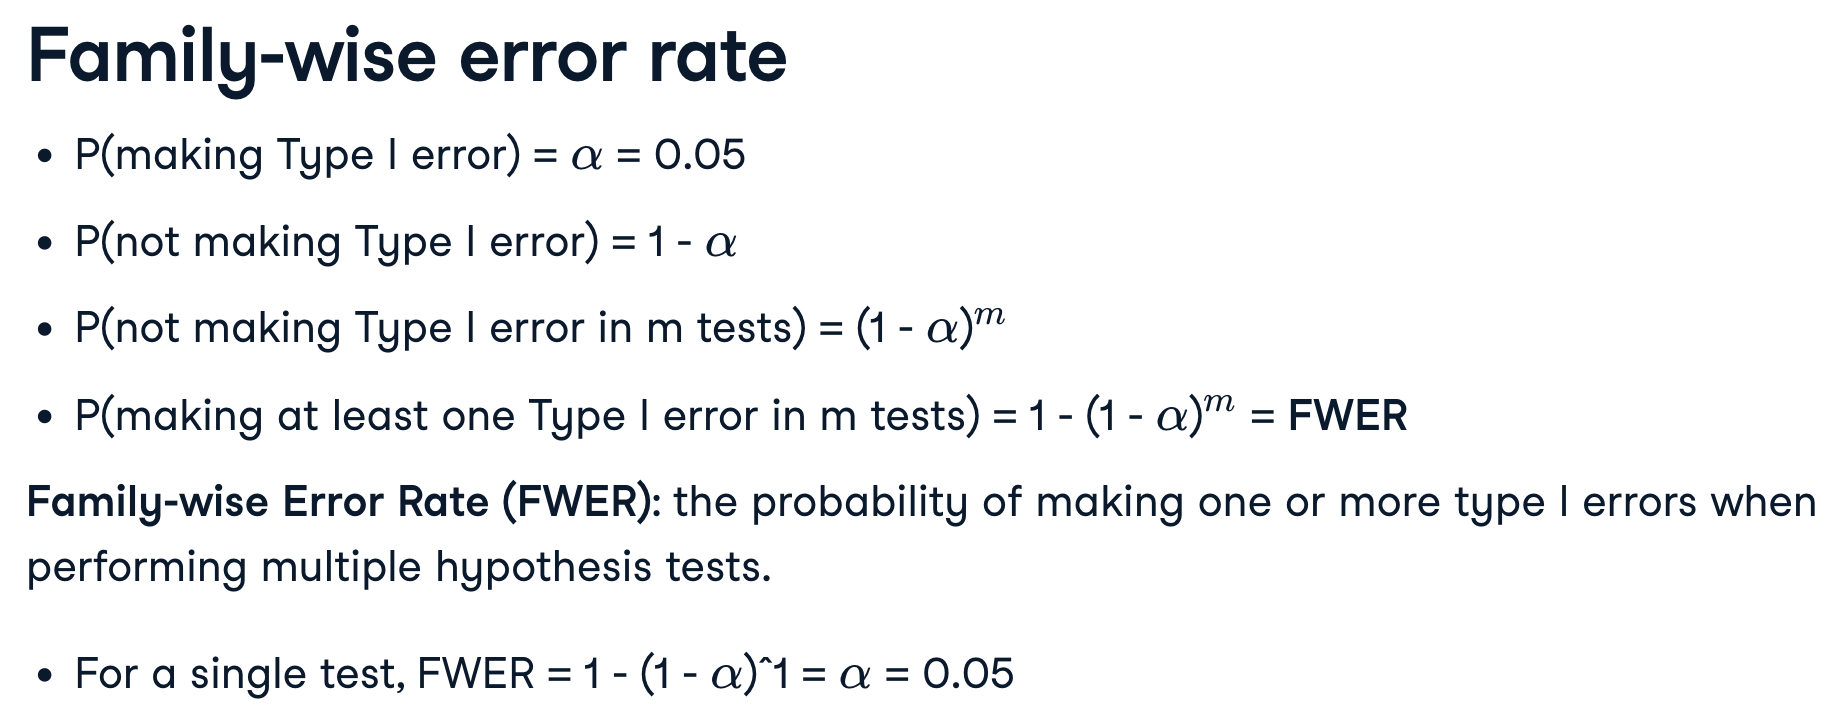

(Picture Source datacamp Ab test)

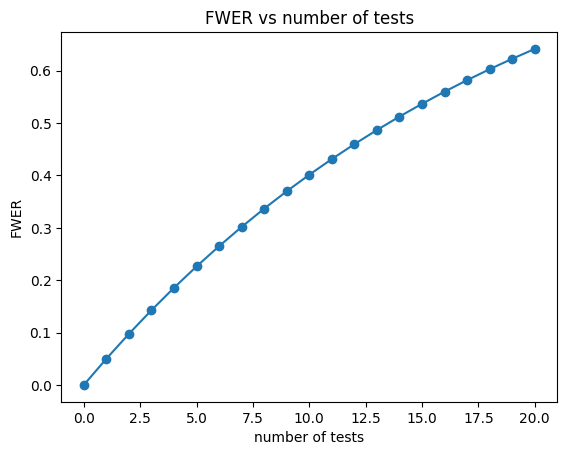

In [ ]:
#family wise error rate
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
x= np.linspace(0,20,21)
y = 1-(1-alpha)**x
plt.plot(x,y,marker="o")
plt.title("FWER vs number of tests")
plt.xlabel("number of tests")
plt.ylabel("FWER")
plt.show()

FWER for 10 test is 40% (from 5% to 40% error) :O

Now how to correct this?

**Correction methods**

the simple and most popular approach is the **Bonferroni Correction**
set the adjusted α* to the individual test α divided by the number of tests.

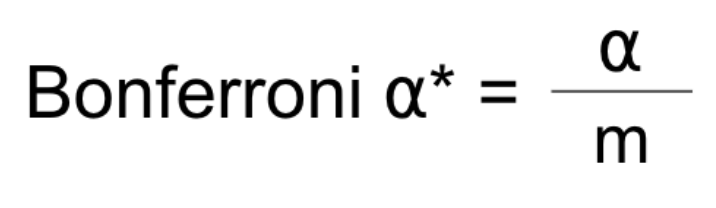

there are other method like **sidak method.** (need to check this out!)

In [ ]:
#statsmodels multiple tests method
import statsmodels.stats.multitest as smt
pvals = [0.023, 0.0005, 0.00004]

In [ ]:
corrected = smt.multipletests(pvals, alpha=0.05, method="bonferroni")

In [ ]:
print("Significant Test:", corrected[0])
print("Corrected P-values:",corrected[1])
print("Bonferroni Corrected alpha: {:.4f}".format(corrected[3]))

Significant Test: [False  True  True]
Corrected P-values: [0.069   0.0015  0.00012]
Bonferroni Corrected alpha: 0.0167


## DATA CLEANING AND EXPLORATORY ANALYSIS

1. Cleaning Missing Value
-> drop, ignore, impute

In [ ]:
#calculate the mean order value
checkout.order_value.mean()

30.009691759377244

In [ ]:
#replace missing values with zero and get mean
# (sometimes right somtimes not suitable)

checkout['order_value'].fillna(0).mean()

25.35818953667377

2. Cleaning duplicates


In [ ]:
#unique users in group B
print(checkout[checkout['checkout_page']=='B']['user_id'].nunique())


#unique users who purchased at least once
print(checkout[checkout["checkout_page"]=="B"].groupby('user_id')['purchased'].max().sum())

#total purchase events in group B
print(checkout[checkout['checkout_page']=='B']['purchased'].sum())

2938
2491.0
2541.0


# **SANITY CHECKS** internal validity

Sample Ration Mismatch (SRM)
allocation accross variants deviates form design




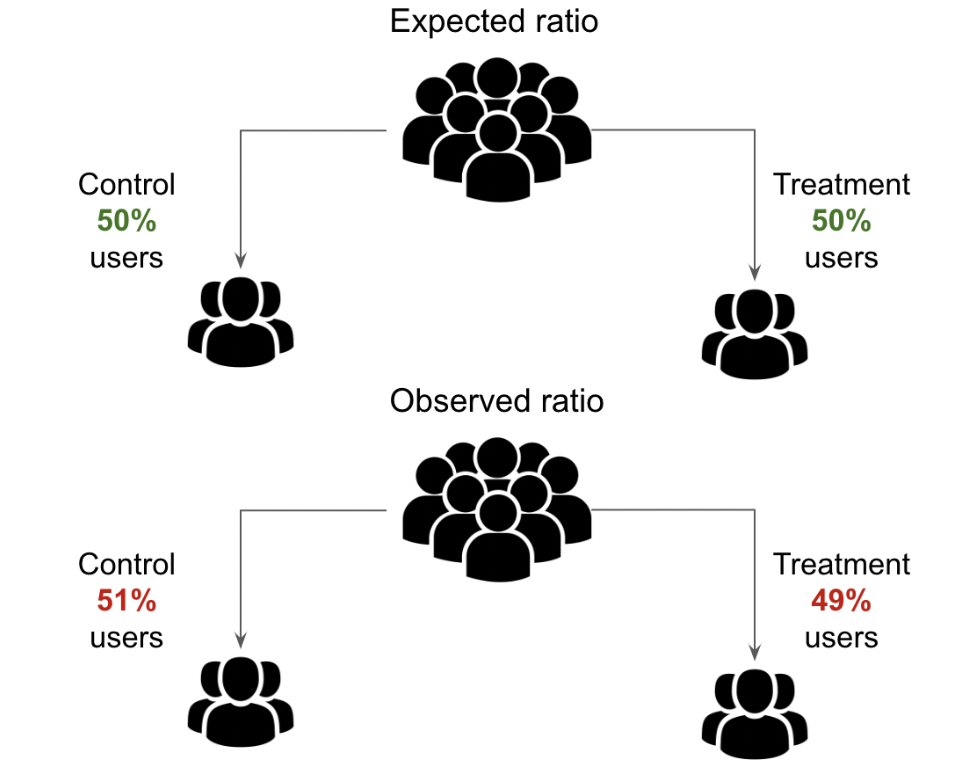

(Picture Source datacamp Ab test)

this happens when we detect deviations (difference) in the ratio of traffic allocated between variants compared to test design.

for example, if we design for 50/50 allocation between the treatment and control groups, and we design for 50/50 allocation between the treatment and control groups, and we instead get a fifty-one forty-nine, this could be a sign of a bug in traffic allocation that needs to be examined further.

in order to statistically confirm that the observed ratio is not something that happened due to chance, we run a chi-square goodness-of-fit test.


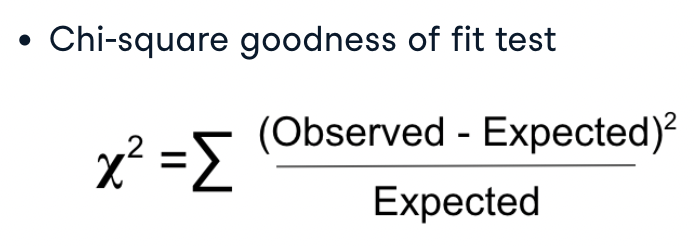

The null hypothesis states that the allocated traffic matches the experiment design which is 50/50 in this case.

if the p value is lower thana strict significance threshold of 1% for instance, then we reject the Null hypothesis and conclude that if we continue running the experiment, the results may be invalid due to a bug.


# SRM python example

In [ ]:
adSmart.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0

In [ ]:
#Calculate the unique IDs per variant
adSmart.groupby("experiment")['auction_id'].nunique()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [ ]:
#assign the nunique counts to each variant
control_users = adSmart[adSmart['experiment']=='control']['auction_id'].nunique()
exposed_users=adSmart[adSmart['experiment']=='exposed']['auction_id'].nunique()
total_users=control_users+exposed_users

In [ ]:
#calculate allocations rations per variant
control_perc = control_users/total_users
exposed_perc=exposed_users / total_users

In [ ]:
print("Percentage of users in the Control group:", 100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:", 100*round(exposed_perc,5),"%")

Percentage of users in the Control group: 50.402 %
Percentage of users in the Exposed group: 49.598 %


to examine the results statistically, we import the chisquared test

In [ ]:
from scipy.stats.contingency import expected_freq
#create lists of observed and expected counts per variant
observed = [control_users, exposed_users]
expected = [total_users/2, total_users/2]

#import chisquare from scipy library
from scipy.stats import chisquare

#run square test on observed and expected lists
chi = chisquare(observed, f_exp=expected)

#print test results and interpretation
print(chi)

if chi[1] < 0.01:
  print("SRM may be present")
else:
  print("SRM likely not present")



Power_divergenceResult(statistic=0.5230902562832735, pvalue=0.4695264353014863)
SRM likely not present


# **A/A TEST**

1. presents and identical experience to two groups of users
2. reveals bugs in experimental setup
3. No statistically significance differences between the metrics (how can you test the same thing but result in siginificance ??)
4. false positive can still happen at the specified alpha (5% of the time)
5. reveals imbalances in distributions acros groups (e.g. browsers, devices, etc) [if for instances people using smartphones are more likely to purchase than those on PC and the experiment setup enrolls more smart phone users in group A, then the purchase rate in that group will be biased and that difference would be mistakenly attributed to group A's design)


In [ ]:
#DISTRIBUTION BALANCE python example

#balanced browser distribution
#valid test
checkout.groupby('checkout_page')['browser'].value_counts(normalize="True")


checkout_page  browser
A              chrome     0.341333
               safari     0.332000
               firefox    0.326667
B              safari     0.352000
               firefox    0.325000
               chrome     0.323000
C              safari     0.346000
               chrome     0.330000
               firefox    0.324000
Name: browser, dtype: float64

In [ ]:
#imbalance browsers distribution
#invalide test
adSmart.groupby('experiment')['browser'].value_counts(normalize=True)

experiment  browser                   
control     Chrome Mobile                 0.591992
            Facebook                      0.137804
            Samsung Internet              0.120855
            Chrome Mobile WebView         0.071727
            Mobile Safari                 0.060427
            Chrome Mobile iOS             0.008352
            Mobile Safari UI/WKWebView    0.007369
            Pinterest                     0.000491
            Android                       0.000246
            Chrome                        0.000246
            Opera Mini                    0.000246
            Puffin                        0.000246
exposed     Chrome Mobile                 0.535197
            Chrome Mobile WebView         0.298802
            Samsung Internet              0.082876
            Facebook                      0.050674
            Mobile Safari                 0.022716
            Chrome Mobile iOS             0.004244
            Mobile Safari UI/WKWebView    0

In [ ]:
checkout.head()

Unnamed: 0  user_id checkout_page  order_value  purchased gender  browser  \
0           0   877621             A    29.410131        1.0      F   chrome   
1           1   876599             A          NaN        0.0      M  firefox   
2           2   905407             A    27.446845        1.0      M   chrome   
3           3   883562             A    30.602233        1.0      M   safari   
4           4   840542             A    29.668895        1.0      F   safari   

   time_on_page  
0     66.168628  
1     49.801887  
2     56.744856  
3     71.890718  
4     67.410696